In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\namin\AppData\Local\Temp\ipykernel_9072\2536410471.py:2: SyntaxWarning: invalid escape sequence '\p'
  df_results = pd.read_csv("D:\phd\simulation_results_50_rows_g1.csv") #remove_outliers(df_results)


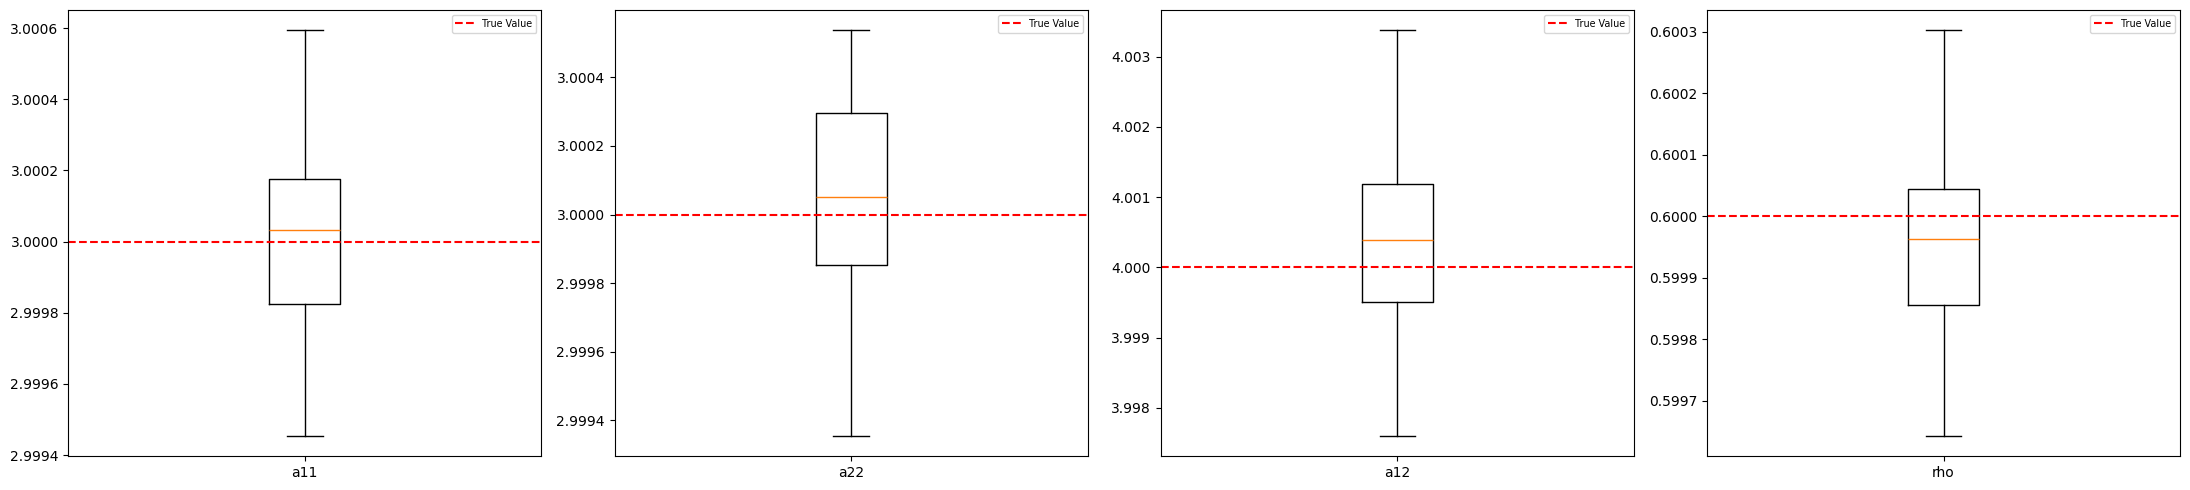

In [3]:
#g1
df_results = pd.read_csv("D:\phd\simulation_results_50_rows_g1.csv") #remove_outliers(df_results)
TRUE_PARAMS =[3.0, 3.0, 4.0, 0.6] # [2.0, 2.0, 4.5, 0.7]

import matplotlib.ticker as ticker

# Create the figure with 6 subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 5)) 

param_names = ['a11', 'a22', 'a12', 'rho']
bounds = [[2, 4], [2, 4], [2, 6], [0.3, 1]]

for i, col in enumerate(param_names):
    # Extract the individual column for independent processing
    col_data = df_results[col]
    
    # Calculate IQR for this parameter independently
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter only this column's data for the current plot
    filtered_col = col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]
    
    # Plotting
    axes[i].boxplot(filtered_col)
    axes[i].axhline(TRUE_PARAMS[i], color='red', linestyle='--', label='True Value')
    
    # FIX: Remove the +3 offset and force absolute values on y-axis
    axes[i].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    axes[i].yaxis.get_major_formatter().set_scientific(False) # Optional: prevents 1e3 notation
    
    # Add Mean line based on the filtered data
    mean_val = filtered_col.mean()
    #axes[i].axhline(mean_val, color='green', linestyle='-.', label=f'Mean: {mean_val:.2f}')
    
    #axes[i].set_title(f'Estimation of {col}')
    
    # Formatting fixes
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([col])
    #axes[i].set_ylim(bounds[i])
    axes[i].legend(fontsize='x-small', loc='upper right')

plt.tight_layout()
plt.show()

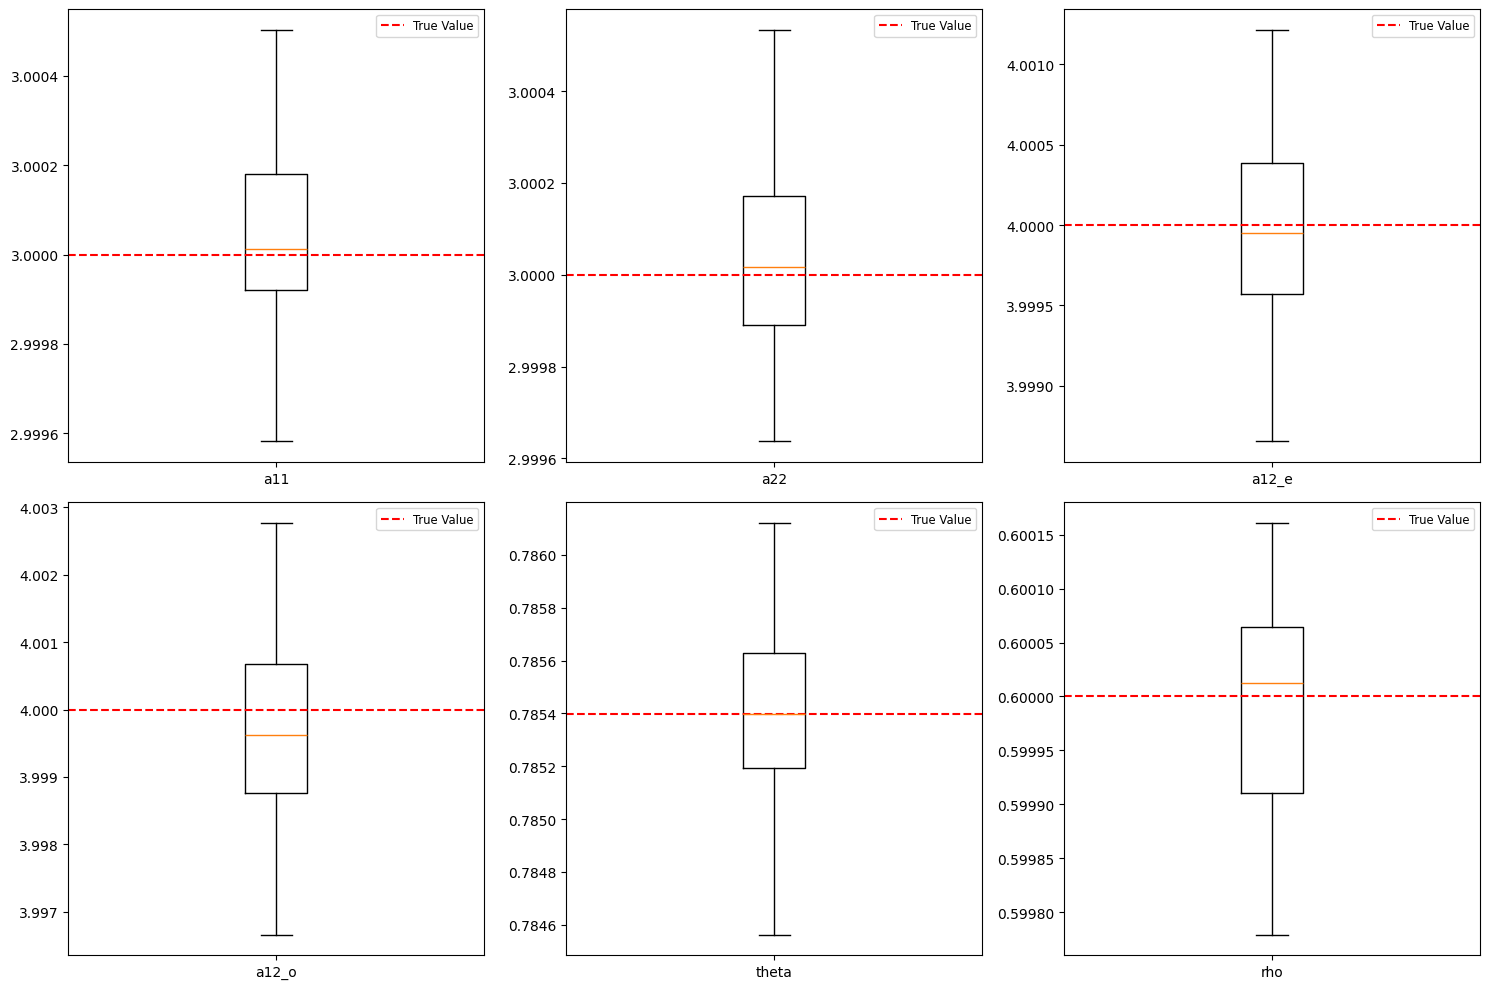

In [7]:
#g2
# Load data
df_results = pd.read_csv(r"D:\phd\simulation_results_50_rows_g2.csv") 
TRUE_PARAMS = [3.0, 3.0, 4.0, 4.0, np.pi/4, 0.6]
param_names = ['a11', 'a22', 'a12_e', 'a12_o', 'theta', 'rho']

# Create the figure with 2 rows and 3 columns (6 total slots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
axes_flat = axes.flatten() # Flatten to 1D for easier looping

for i, col in enumerate(param_names):
    # Extract the individual column
    col_data = df_results[col]
    
    # Calculate IQR for outlier filtering
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_col = col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]
    
    # Plotting on the flattened axis
    ax = axes_flat[i]
    ax.boxplot(filtered_col)
    ax.axhline(TRUE_PARAMS[i], color='red', linestyle='--', label='True Value')
    
    # FIX: Force absolute values on y-axis (removes +3.14e-1 style offsets)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax.yaxis.get_major_formatter().set_scientific(False)
    
    #ax.set_title(f'Estimation of {col}', fontsize=12)
    ax.set_xticks([1])
    ax.set_xticklabels([col])
    ax.legend(fontsize='small', loc='upper right')

plt.tight_layout()
plt.show()

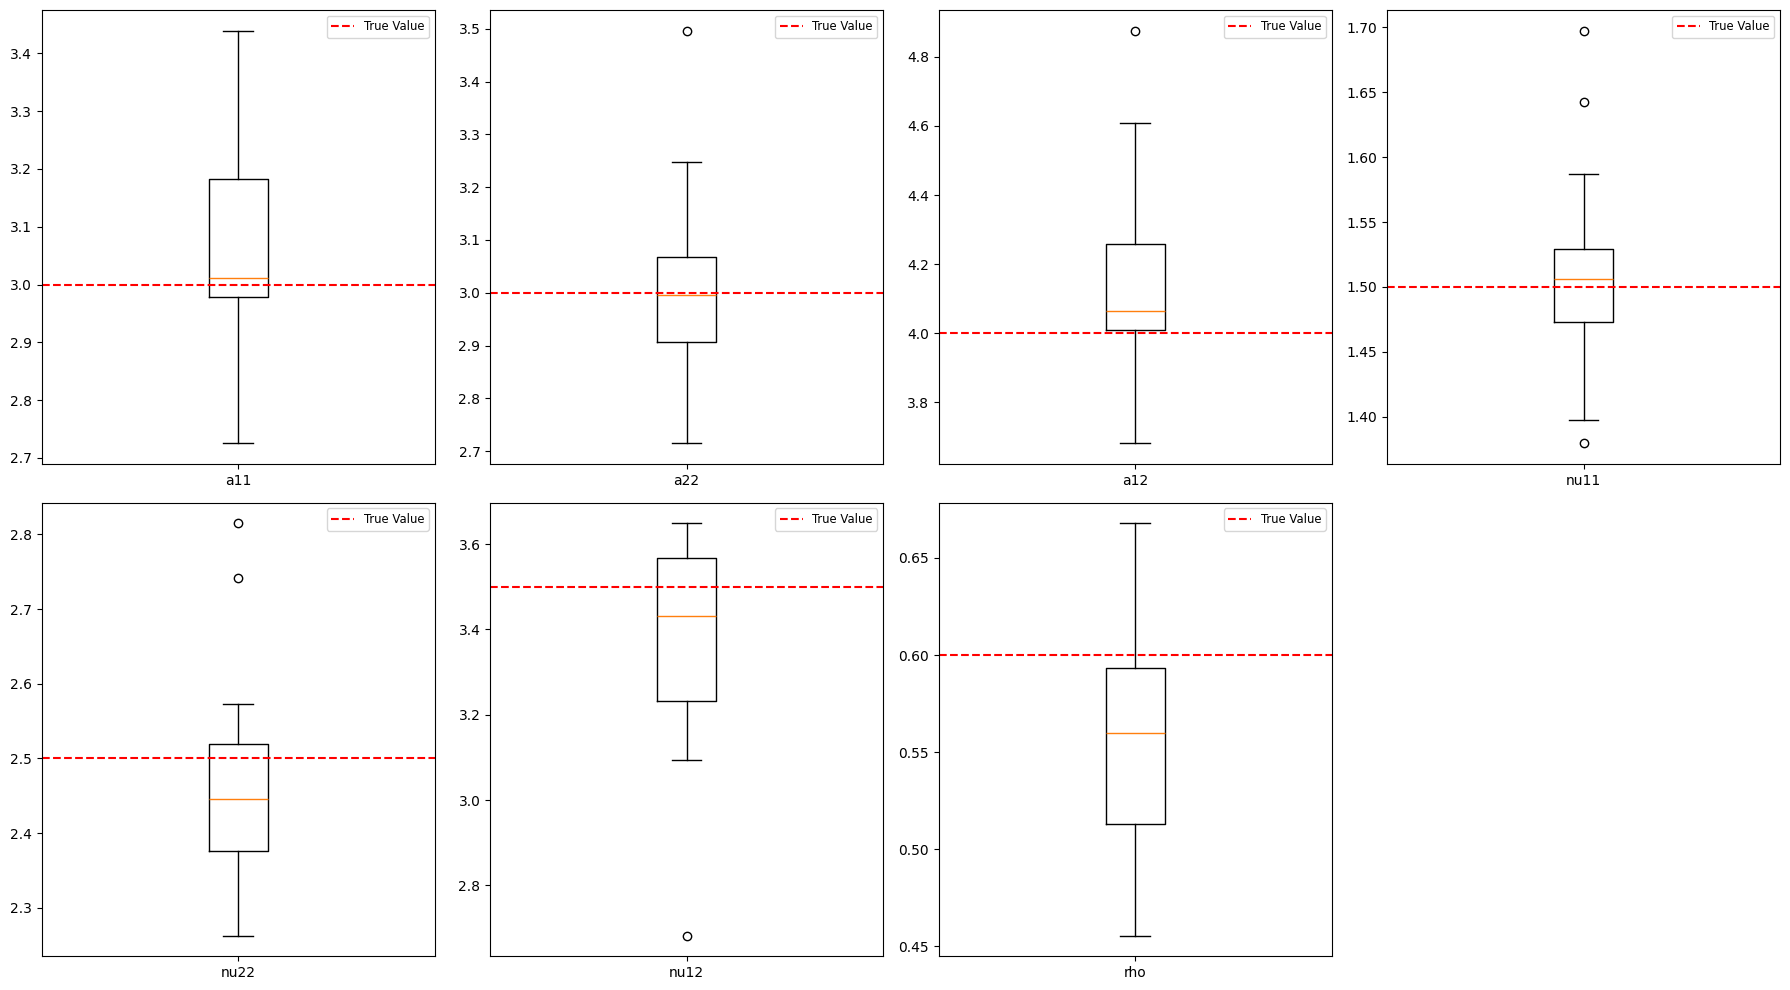

In [2]:
#m1
# Load data
df_results = pd.read_csv(r"D:\phd\simulation_results_50_rows_m1.csv") 
TRUE_PARAMS = [3.0, 3.0, 4.0, 1.5, 2.5, 3.5, 0.6]
param_names = ['a11', 'a22', 'a12', 'nu11', 'nu22', 'nu12', 'rho']

# Create the figure with 2 rows and 4 columns (8 total slots for 7 params)
fig, axes = plt.subplots(2, 4, figsize=(18, 10)) 
axes_flat = axes.flatten() # Flatten to 1D for easier looping

for i, col in enumerate(param_names):
    # Extract the individual column
    col_data = df_results[col]
    
    # Calculate IQR for outlier filtering
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_col = col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]
    
    # Plotting on the flattened axis
    ax = axes_flat[i]
    ax.boxplot(filtered_col)
    ax.axhline(TRUE_PARAMS[i], color='red', linestyle='--', label='True Value')
    
    # Formatting
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax.yaxis.get_major_formatter().set_scientific(False)
    
    #ax.set_title(f'Estimation of {col}', fontsize=12)
    ax.set_xticks([1])
    ax.set_xticklabels([col])
    ax.legend(fontsize='small', loc='upper right')

# Hide the 8th (empty) subplot
if len(param_names) < len(axes_flat):
    axes_flat[-1].axis('off')

plt.tight_layout()
plt.show()

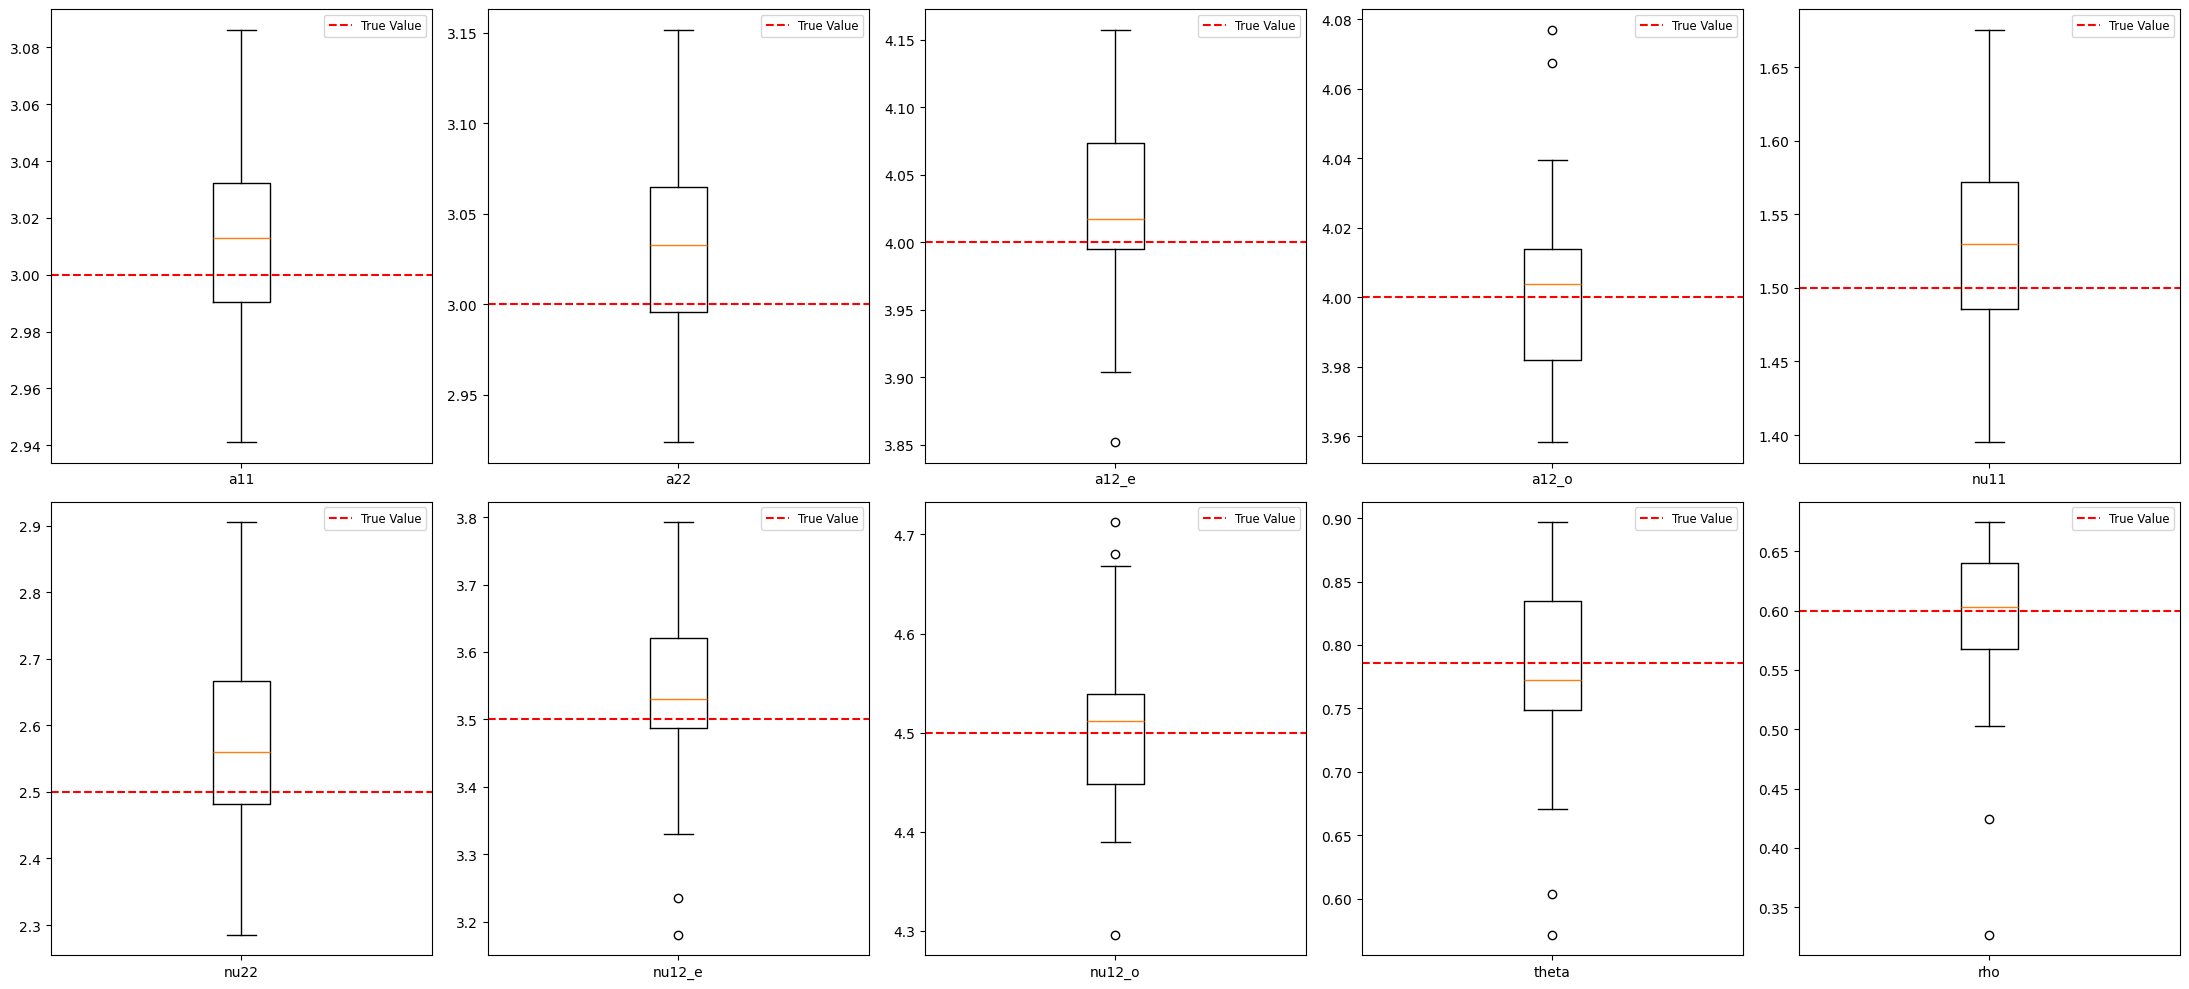

In [11]:
#m2
df_results = pd.read_csv(r"D:\phd\simulation_results_50_rows_m2.csv")
TRUE_PARAMS = [3.0, 3.0, 4.0, 4.0, 1.5, 2.5, 3.5, 4.5, np.pi/4, 0.6] 

param_names = df_results.columns

# Create the figure with 2 rows and 3 columns (6 total slots)
fig, axes = plt.subplots(2, 5, figsize=(22, 10)) 
axes_flat = axes.flatten() # Flatten to 1D for easier looping

for i, col in enumerate(param_names):
    # Extract the individual column
    col_data = df_results[col]
    
    # Calculate IQR for outlier filtering
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_col = col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]
    
    # Plotting on the flattened axis
    ax = axes_flat[i]
    ax.boxplot(filtered_col)
    ax.axhline(TRUE_PARAMS[i], color='red', linestyle='--', label='True Value')
    
    # FIX: Force absolute values on y-axis (removes +3.14e-1 style offsets)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax.yaxis.get_major_formatter().set_scientific(False)
    
    #ax.set_title(f'Estimation of {col}', fontsize=12)
    ax.set_xticks([1])
    ax.set_xticklabels([col])
    ax.legend(fontsize='small', loc='upper right')

plt.tight_layout()
plt.show()

<>:63: SyntaxWarning: invalid escape sequence '\p'
<>:63: SyntaxWarning: invalid escape sequence '\p'
<>:63: SyntaxWarning: invalid escape sequence '\p'
<>:63: SyntaxWarning: invalid escape sequence '\p'
C:\Users\namin\AppData\Local\Temp\ipykernel_9072\2671393467.py:63: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ['0 (Pure Even)', '$\pi/4$ (Mixed)', '$\pi/2$ (Pure Odd)']
C:\Users\namin\AppData\Local\Temp\ipykernel_9072\2671393467.py:63: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ['0 (Pure Even)', '$\pi/4$ (Mixed)', '$\pi/2$ (Pure Odd)']


Generating field for theta = 0.000...
Generating field for theta = 0.785...
Generating field for theta = 1.571...


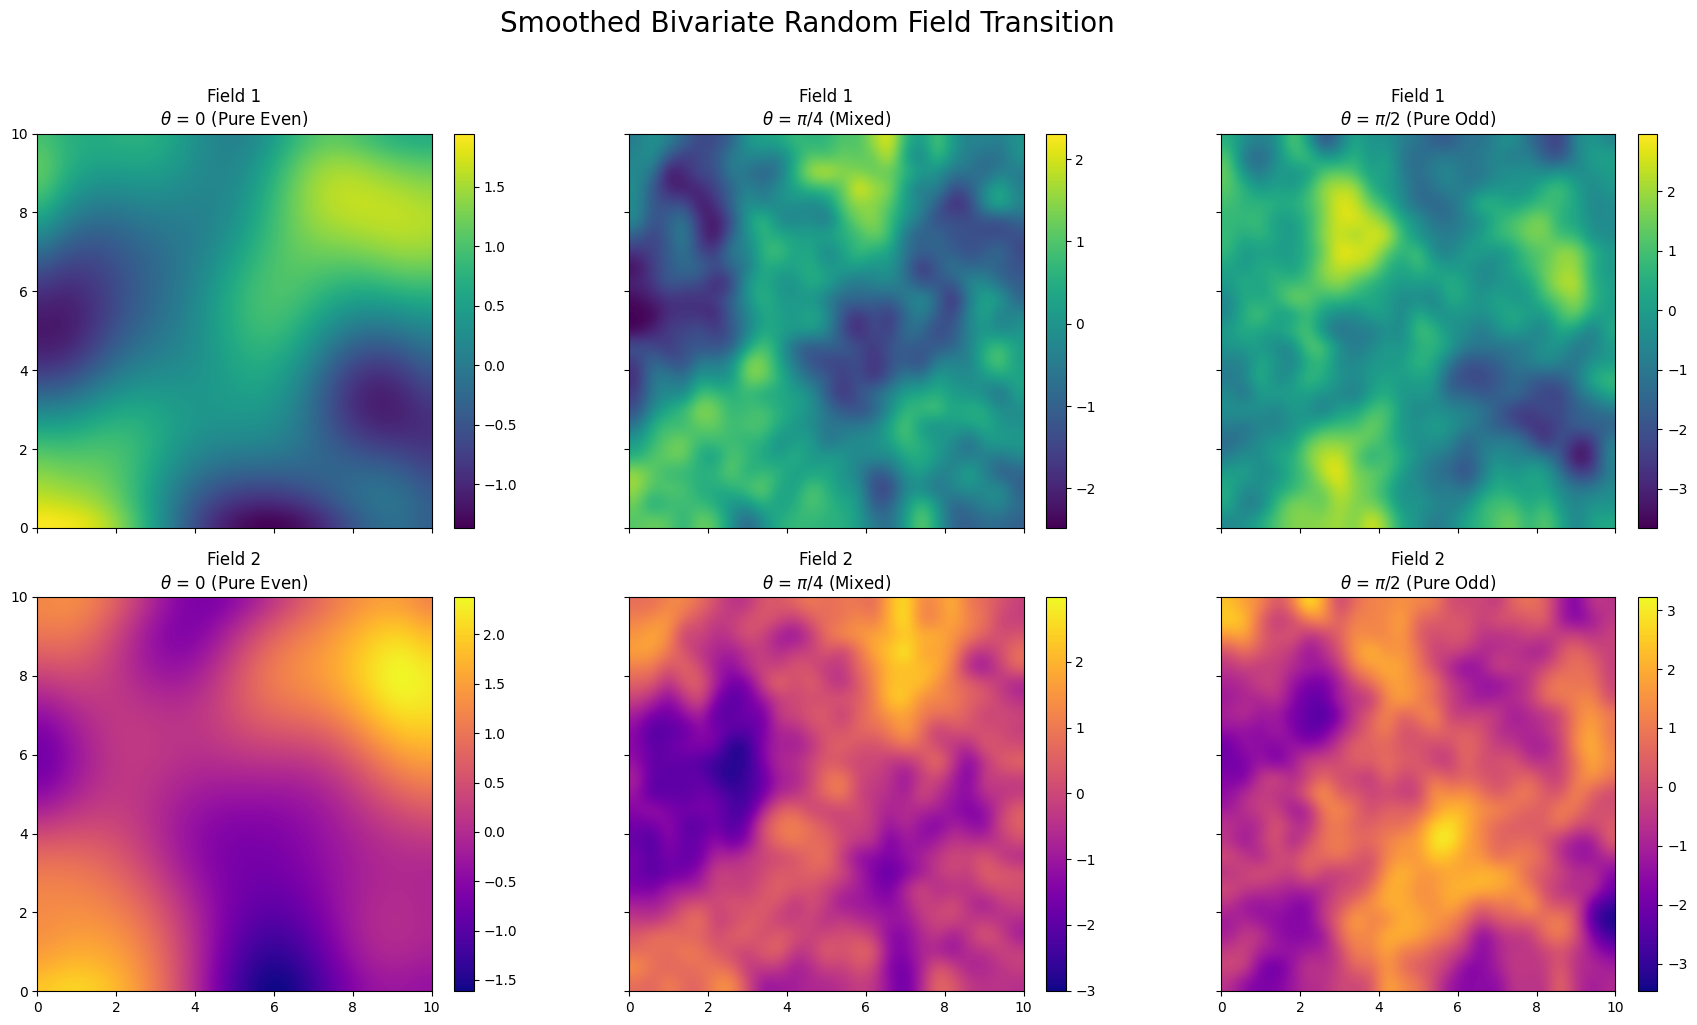

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import cho_factor, cho_solve
from numpy.polynomial import chebyshev

# ============================================================
# Core Covariance Functions
# ============================================================
_EPS = 1e-12
d = 2 
p = 1 

def make_psd(C, eps=1e-7):
    C = 0.5 * (C + C.T)
    w, V = np.linalg.eigh(C)
    w = np.maximum(w, eps)
    return (V * w) @ V.T

def G_even(h, a):
    return np.exp(-(h @ h) / (a * a + _EPS))

def G_odd(h, a, u0):
    hnorm = (h @ h) ** 0.5
    if hnorm < 1e-10: return 0
    Tp = chebyshev.Chebyshev.basis(p)
    return ((-1) ** ((p - 1) / 2)) * (a ** (1 - p)) * Tp((h @ u0) / hnorm) * np.exp(
        -(h @ h) / (2.0 * a + _EPS)
    )

def C2_block(h, a11, a22, a12_even, a12_odd, theta, rho, s1, s2, u0):
    C11 = s1 * s1 * G_even(h, a11)
    C22 = s2 * s2 * G_even(h, a22)
    even_part = G_even(h, a12_even)
    odd_part = G_odd(h, a12_odd, u0)
    
    mix_plus = np.cos(theta) * even_part + np.sin(theta) * odd_part
    mix_minus = np.cos(theta) * even_part - np.sin(theta) * odd_part
    
    C12 = rho * s1 * s2 * mix_plus
    C21 = rho * s1 * s2 * mix_minus
    return np.array([[C11, C12], [C21, C22]])

def build_cov_C2(loc, a11, a22, a12_even, a12_odd, theta, rho, s1, s2, u0):
    N = len(loc)
    C = np.zeros((2 * N, 2 * N))
    for i in range(N):
        for j in range(N):
            h = loc[j] - loc[i]
            C[2 * i:2 * i + 2, 2 * j:2 * j + 2] = C2_block(
                h, a11, a22, a12_even, a12_odd, theta, rho, s1, s2, u0
            )
    return make_psd(C) + np.eye(2*N) * 1e-8

# ============================================================
# Simulation and Visualization
# ============================================================
if __name__ == "__main__":
    BASE_PARAMS = [3.0, 3.0, 4.0, 4.0, 0, 0.85] 
    S1, S2, U0 = 1.0, 1.0, np.array([1.0, 0.0])
    
    theta_values = [0, np.pi/4, np.pi/2]
    theta_labels = ['0 (Pure Even)', '$\pi/4$ (Mixed)', '$\pi/2$ (Pure Odd)']

    grid_res = 25 
    side = np.linspace(0, 10, grid_res)
    x_grid, y_grid = np.meshgrid(side, side)
    plot_loc = np.column_stack([x_grid.ravel(), y_grid.ravel()])

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

    for idx, theta in enumerate(theta_values):
        print(f"Generating field for theta = {theta:.3f}...")
        
        current_params = BASE_PARAMS.copy()
        current_params[4] = theta
        
        C = build_cov_C2(plot_loc, *current_params, S1, S2, U0)
        L = np.linalg.cholesky(C)
        y_full = L @ np.random.normal(size=len(C))
        
        f1 = y_full[0::2].reshape(grid_res, grid_res)
        f2 = y_full[1::2].reshape(grid_res, grid_res)
        
        # Added interpolation='bicubic' for smoothing
        im1 = axes[0, idx].imshow(f1, extent=[0, 10, 0, 10], origin='lower', 
                                 cmap='viridis', interpolation='bicubic')
        axes[0, idx].set_title(f"Field 1\n$\\theta$ = {theta_labels[idx]}")
        fig.colorbar(im1, ax=axes[0, idx], fraction=0.046, pad=0.04)
        
        # Added interpolation='bicubic' for smoothing
        im2 = axes[1, idx].imshow(f2, extent=[0, 10, 0, 10], origin='lower', 
                                 cmap='plasma', interpolation='bicubic')
        axes[1, idx].set_title(f"Field 2\n$\\theta$ = {theta_labels[idx]}")
        fig.colorbar(im2, ax=axes[1, idx], fraction=0.046, pad=0.04)

    plt.suptitle("Smoothed Bivariate Random Field Transition", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\p'
C:\Users\namin\AppData\Local\Temp\ipykernel_9072\1308346198.py:77: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ['0 (Pure Even)', '$\pi/4$ (Mixed)', '$\pi/2$ (Pure Odd)']
C:\Users\namin\AppData\Local\Temp\ipykernel_9072\1308346198.py:77: SyntaxWarning: invalid escape sequence '\p'
  theta_labels = ['0 (Pure Even)', '$\pi/4$ (Mixed)', '$\pi/2$ (Pure Odd)']


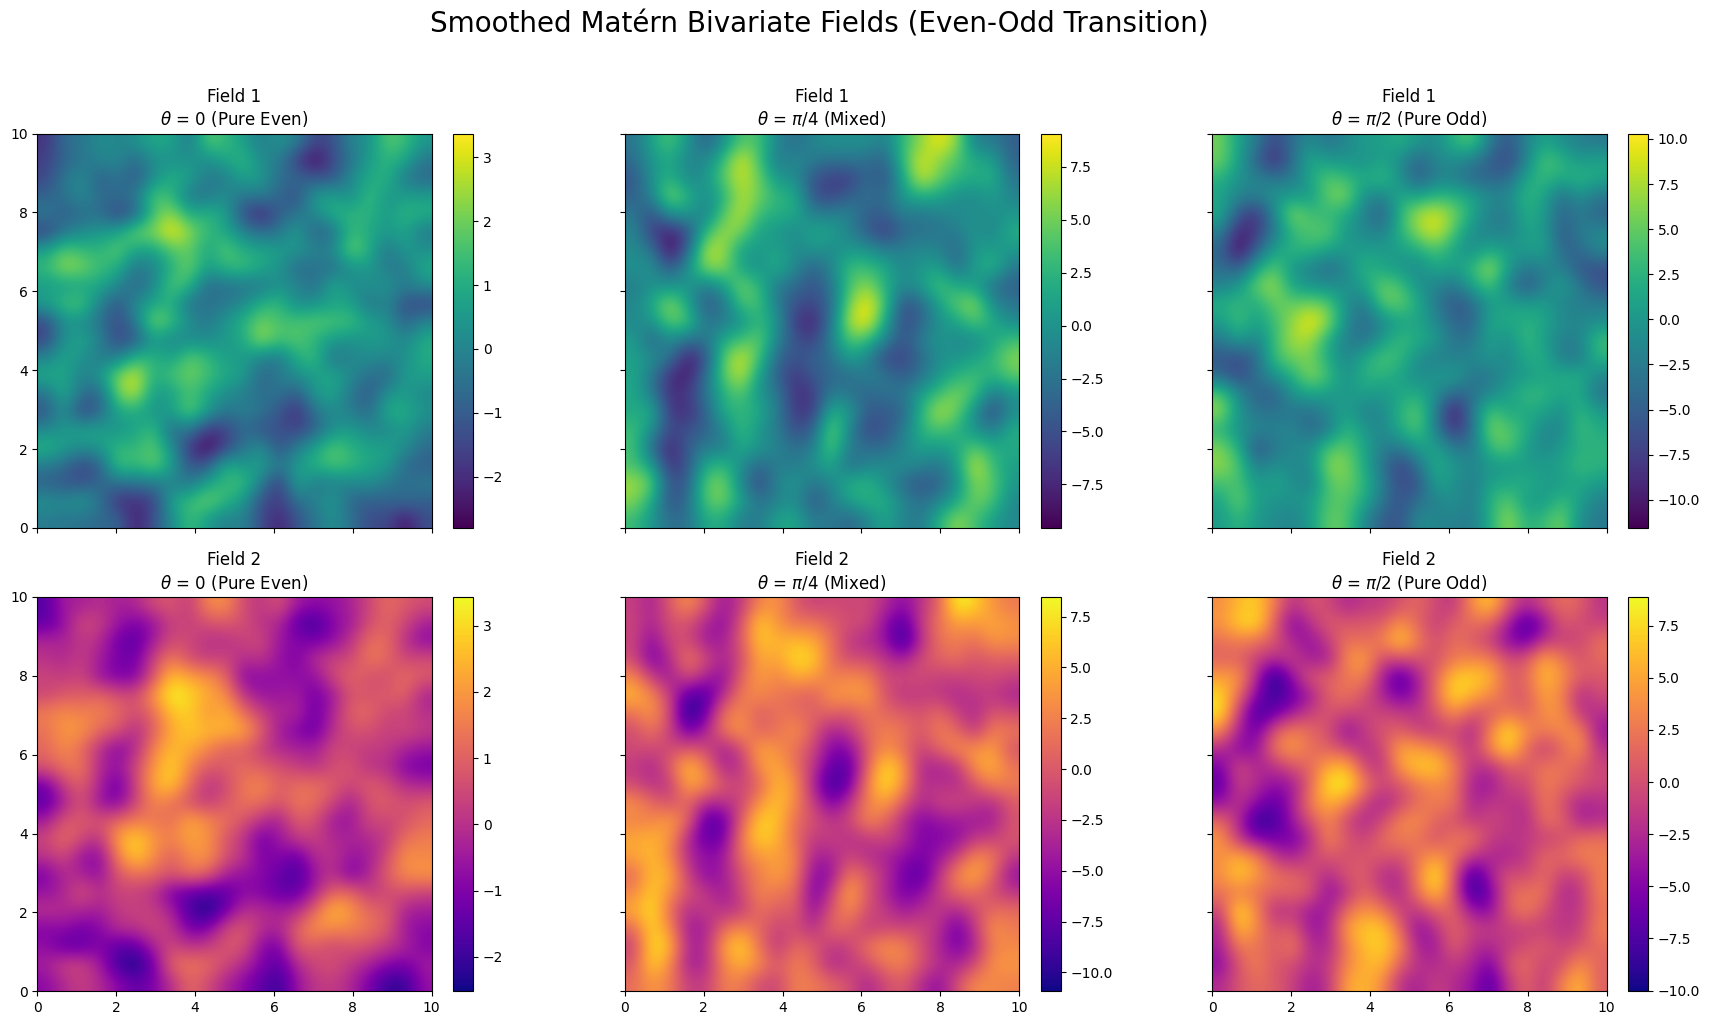

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, kv
from numpy.polynomial import chebyshev

# ============================================================
# Core Matérn Covariance Functions
# ============================================================
_EPS = 1e-12
d = 2 
p = 1 

def make_psd(C, eps=1e-7):
    C = 0.5 * (C + C.T)
    w, V = np.linalg.eigh(C)
    w = np.maximum(w, eps)
    return (V * w) @ V.T

def G_even(h, a, nu):
    hnorm = (h @ h) ** 0.5
    if hnorm == 0:
        return 1.0
    else:
        x = a * hnorm
        val = ((2 ** (1 - nu)) / gamma(nu)) * (x ** nu) * kv(nu, x)
        return float(val) if np.isfinite(val) else 0.0

def G_odd(h, a, u0, nu):
    hnorm = (h @ h) ** 0.5
    if hnorm == 0:
        return 0.0
    else:
        Tp = chebyshev.Chebyshev.basis(p)
        x = a * hnorm
        val = (
            ((-1) ** ((p - 1) / 2))
            * (x ** nu)
            * Tp((h @ u0) / hnorm)
            * kv(p - nu, x)
        )
        return float(val) if np.isfinite(val) else 0.0

def C2_block(h, a11, a22, a12_even, a12_odd, nu11, nu22, nu12_even, nu12_odd, theta, rho, s1, s2, u0):
    C11 = s1 * s1 * G_even(h, a11, nu11)
    C22 = s2 * s2 * G_even(h, a22, nu22)
    even_part = G_even(h, a12_even, nu12_even)
    odd_part = G_odd(h, a12_odd, u0, nu12_odd)
    
    mix_plus = np.cos(theta) * even_part + np.sin(theta) * odd_part
    mix_minus = np.cos(theta) * even_part - np.sin(theta) * odd_part
    
    C12 = rho * s1 * s2 * mix_plus
    C21 = rho * s1 * s2 * mix_minus
    return np.array([[C11, C12], [C21, C22]])

def build_cov_C2(loc, a11, a22, a12_even, a12_odd, nu11, nu22, nu12_even, nu12_odd, theta, rho, s1, s2, u0):
    N = len(loc)
    C = np.zeros((2 * N, 2 * N))
    for i in range(N):
        for j in range(N):
            h = loc[j] - loc[i]
            C[2 * i:2 * i + 2, 2 * j:2 * j + 2] = C2_block(
                h, a11, a22, a12_even, a12_odd, nu11, nu22, nu12_even, nu12_odd, theta, rho, s1, s2, u0
            )
    return make_psd(C) + np.eye(2*N) * 1e-8

# ============================================================
# Main Execution for Smoothed Visualization
# ============================================================
if __name__ == "__main__":
    # Parameters including nu (smoothness) values
    # a11, a22, a12_e, a12_o, nu11, nu22, nu12_e, nu12_o, theta, rho
    TRUE_PARAMS = [3.0, 3.0, 4.0, 4.0, 1.5, 2.5, 3.5, 4.5, 0.0, 0.8] 
    S1, S2, U0 = 1.0, 1.0, np.array([1.0, 0.0])
    
    theta_values = [0, np.pi/4, np.pi/2]
    theta_labels = ['0 (Pure Even)', '$\pi/4$ (Mixed)', '$\pi/2$ (Pure Odd)']

    # Grid Setup (Keep res moderate for memory, use interpolation for visual smoothness)
    grid_res = 22 
    side = np.linspace(0, 10, grid_res)
    x_grid, y_grid = np.meshgrid(side, side)
    plot_loc = np.column_stack([x_grid.ravel(), y_grid.ravel()])

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

    for idx, theta in enumerate(theta_values):
        current_params = TRUE_PARAMS.copy()
        current_params[8] = theta # Update theta
        
        # Build Covariance and Sample
        C = build_cov_C2(plot_loc, *current_params, S1, S2, U0)
        L = np.linalg.cholesky(C)
        y_full = L @ np.random.normal(size=len(C))
        
        # De-interleave fields
        f1 = y_full[0::2].reshape(grid_res, grid_res)
        f2 = y_full[1::2].reshape(grid_res, grid_res)
        
        # Plotting with bicubic interpolation for smoothing
        im1 = axes[0, idx].imshow(f1, extent=[0, 10, 0, 10], origin='lower', 
                                 cmap='viridis', interpolation='bicubic')
        axes[0, idx].set_title(f"Field 1\n$\\theta$ = {theta_labels[idx]}")
        fig.colorbar(im1, ax=axes[0, idx], fraction=0.046, pad=0.04)
        
        im2 = axes[1, idx].imshow(f2, extent=[0, 10, 0, 10], origin='lower', 
                                 cmap='plasma', interpolation='bicubic')
        axes[1, idx].set_title(f"Field 2\n$\\theta$ = {theta_labels[idx]}")
        fig.colorbar(im2, ax=axes[1, idx], fraction=0.046, pad=0.04)

    plt.suptitle("Smoothed Matérn Bivariate Fields (Even-Odd Transition)", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()